In [246]:
import bond_embedding
import numpy as np
from scipy.io import mmread
import scipy.sparse as sp
import torch
import edges_embedding
import nodes_embedding
import GAT_Layer


In [247]:

bond_embed = bond_embedding.Bond_Embedding(f'/Users/jiaoyuan/Documents/GitHub/deeph_dft_molecules/deeph_mol/dataset/mol/30.mol2','/Users/jiaoyuan/Documents/GitHub/deeph_dft_molecules/deeph_mol/dataset/edges',30)
bond_type_matrix = bond_embed.get_bond_type()
gb_matrix = bond_embed.gaussian_basis_matrix()
distance, index = bond_embed.get_atom_pairs_distance()
degree_matrix = edges_embedding.Edges_Embedding('/Users/jiaoyuan/Documents/GitHub/deeph_dft_molecules/deeph_mol/dataset/mol/30.mol2').get_degree_matrix()
Hamiltonian_matrix = sp.load_npz('/Users/jiaoyuan/Documents/GitHub/deeph_dft_molecules/deeph_mol/dataset/Hamiltonian/30_h.npz')
Overlap_matrix = sp.load_npz('/Users/jiaoyuan/Documents/GitHub/deeph_dft_molecules/deeph_mol/dataset/Hamiltonian/30_o.npz')
print(np.sqrt(distance))


[ 0.          1.91794973  2.70096934  2.68656119  4.02026008  4.62193982
  4.17636689  5.12460133  4.70200315  3.3763226   2.89877918  1.82038395
  2.99138854  4.62186626  5.48639608  4.86703096  5.67501001  5.20198395
  3.52298006  3.48384402  1.48707409  1.48707093  3.76568219  4.83830817
  5.70664096  6.18963907  5.41084805  6.56136173  6.75359363  5.96271418
  1.91794973  0.          1.3583882   2.39632853  3.71263234  4.81001654
  4.92778249  6.17196809  6.11083606  4.9085885   3.99934107  2.62026138
  1.43011545  2.78353297  3.93379832  3.69899794  4.85433273  4.87047234
  3.58186555  2.55151809  2.82299495  2.82302984  2.17713067  4.13930277
  5.80021024  7.15094405  6.97492613  4.96110905  5.85529883  5.84931462
  2.70096934  1.3583882   0.          1.47449013  2.54868495  3.81495351
  4.26623834  5.63553372  5.87511612  4.8671555   3.69070062  2.40868701
  2.46372754  3.13151649  4.64772342  4.73957622  6.01405157  6.17172615
  4.93929593  3.77820573  3.68352924  3.68353473  1

In [248]:
gb_matrix

array([[3.98942280e-01, 6.34055350e-02, 1.03936917e-02, 1.08050243e-02,
        1.23387089e-04, 9.16514938e-06, 6.50757411e-05, 7.91205624e-07,
        6.31012316e-06, 1.33514460e-03, 5.97363955e-03, 7.60900792e-02,
        4.54766564e-03, 9.16826592e-06, 1.16054083e-07, 2.86502439e-06,
        4.05063187e-08, 5.30600176e-07, 8.05028580e-04, 9.23330701e-04,
        1.32042267e-01, 1.32042888e-01, 3.32417216e-04, 3.29352704e-06,
        3.38335113e-08, 1.91269146e-09, 1.75158096e-07, 1.78814457e-10,
        4.97280484e-11, 7.59391394e-09],
       [6.34055350e-02, 3.98942280e-01, 1.58571801e-01, 2.25925802e-02,
        4.05350682e-04, 3.77515883e-06, 2.12772198e-06, 2.13343269e-09,
        3.10548107e-09, 2.33836390e-06, 1.34183402e-04, 1.28833000e-02,
        1.43480859e-01, 8.28783569e-03, 1.74022990e-04, 4.26357902e-04,
        3.04743080e-06, 2.81742010e-06, 6.53074763e-04, 1.53896386e-02,
        7.41990683e-03, 7.41917616e-03, 3.72953171e-02, 7.59183404e-05,
        1.97490991e-08,

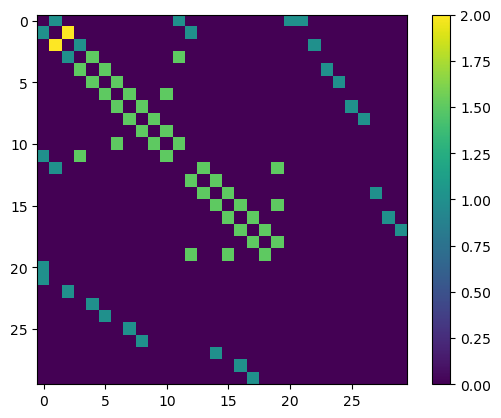

In [249]:
import matplotlib.pyplot as plt

plt.imshow(bond_type_matrix)
plt.colorbar()
plt.show()


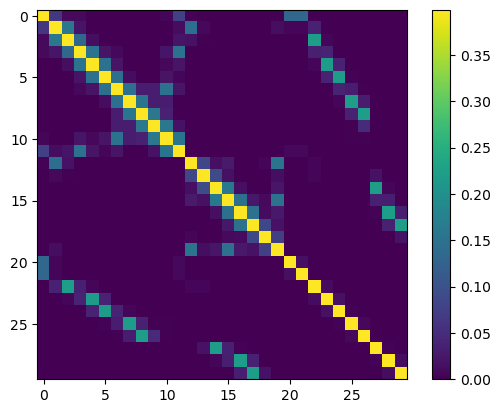

In [250]:
plt.imshow(gb_matrix)
plt.colorbar()
plt.show()

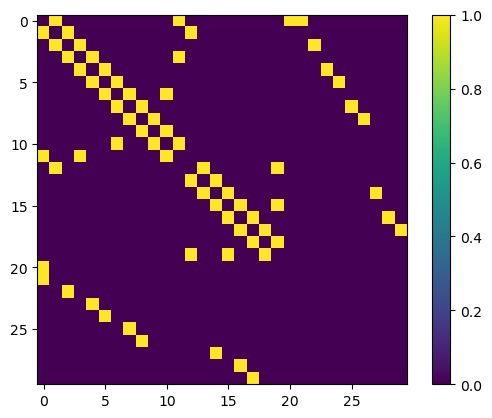

In [251]:
plt.imshow(degree_matrix)
plt.colorbar()

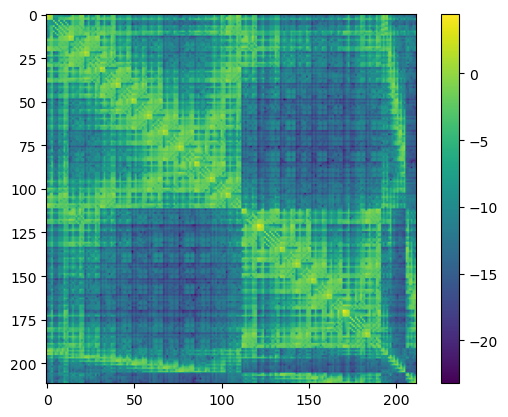

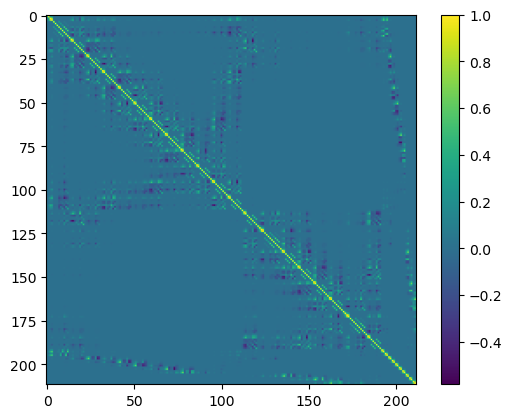

In [252]:
plt.imshow(np.log(np.abs(Hamiltonian_matrix.toarray())))
plt.colorbar()
plt.show()
plt.imshow(Overlap_matrix.toarray())
plt.colorbar()
plt.show()


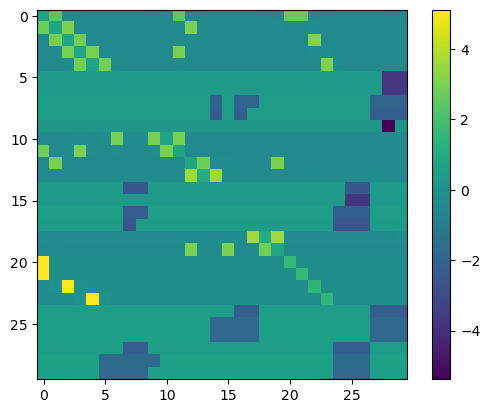

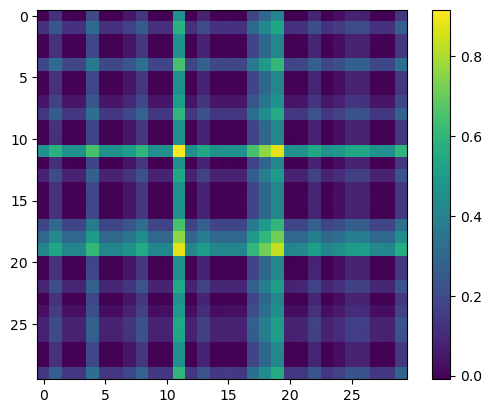

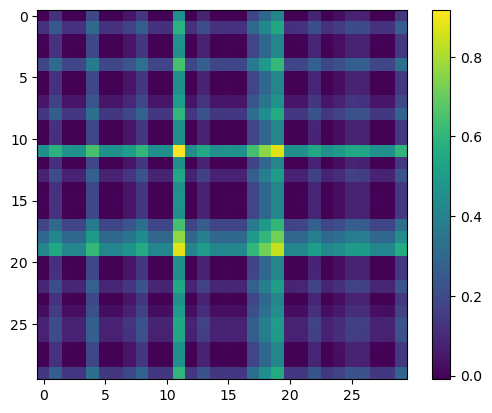

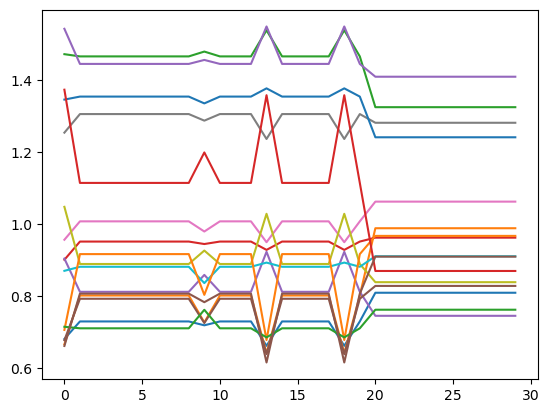

In [253]:
mol2 = '/Users/jiaoyuan/Documents/GitHub/deeph_dft_molecules/deeph_mol/dataset/mol/30.mol2'
nodes_embed = nodes_embedding.Nodes_Embedding(mol2)
nodes_features = nodes_embed.forward()
edges_embedding_embed = edges_embedding.Edges_Embedding(mol2)
degree_matrix = edges_embedding_embed.get_degree_matrix()
degree_tensor = torch.from_numpy(degree_matrix)
gat_layer = GAT_Layer.GATlayer(nodes_features.shape[1], nodes_features.shape[1], 1)
edges1, edges2, degree_tensor = edges_embedding_embed.forward()
gat_layer = GAT_Layer.GATlayer(nodes_features.shape[1], nodes_features.shape[1], 3)
out_nodes_features, connectivity_mask = gat_layer(nodes_features, degree_tensor, torch.Tensor(bond_type_matrix), torch.Tensor(gb_matrix))

plt.imshow(connectivity_mask.detach().numpy())
plt.colorbar()
plt.show()
plt.imshow(edges2.detach().numpy())
plt.colorbar()
plt.show()
plt.imshow(edges1.detach().numpy())
plt.colorbar()
plt.show()

plt.plot(nodes_features.detach().numpy())
plt.show()

In [254]:
connectivity_mask

tensor([[ 0.6329,  2.4021, -0.4017, -0.4006, -0.4291, -0.4294, -0.4292, -0.4294,
         -0.4294, -0.4258, -0.4135,  2.4359, -0.4173, -0.4294, -0.4294, -0.4294,
         -0.4294, -0.4294, -0.4272, -0.4269,  2.5849,  2.5849, -0.4285, -0.4294,
         -0.4294, -0.4294, -0.4294, -0.4294, -0.4294, -0.4294],
        [ 2.7581,  0.7963,  3.0391, -0.3149, -0.3804, -0.3816, -0.3816, -0.3816,
         -0.3816, -0.3816, -0.3812, -0.3436,  2.9945, -0.3571, -0.3811, -0.3804,
         -0.3816, -0.3816, -0.3797, -0.3362, -0.3597, -0.3597, -0.2715, -0.3814,
         -0.3816, -0.3816, -0.3816, -0.3816, -0.3816, -0.3816],
        [-0.3470,  2.8996,  0.7516,  2.8316, -0.3326, -0.3756, -0.3763, -0.3764,
         -0.3764, -0.3764, -0.3752, -0.3144, -0.3222, -0.3681, -0.3764, -0.3764,
         -0.3764, -0.3764, -0.3764, -0.3755, -0.3752, -0.3752,  3.0793, -0.3549,
         -0.3764, -0.3764, -0.3764, -0.3764, -0.3764, -0.3764],
        [-0.3551, -0.3209,  2.9049,  0.7709,  2.9547, -0.3248, -0.3633, -0.3862